In [2]:
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, AdamW
from torch import nn
import matplotlib.pyplot as plt
from data import create_dataloader
from classifier import SpoilerClassifier
from train_test import train, evaluate

In [3]:
reviews = pd.read_csv('reviews.csv', index_col=0)
# Добавление дополнительной колонки с текстовыми метками
reviews['is_spoiler_text'] = np.where(reviews['is_spoiler'] == 0, 'Non-spoiler', 'Spoiler')

Text(0.5, 1.0, 'Frequency of Classes')

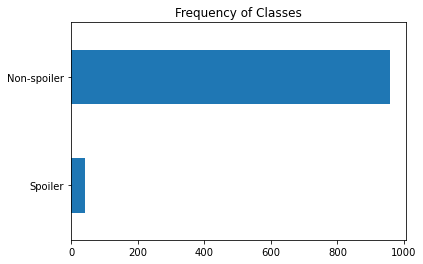

In [8]:
reviews['is_spoiler_text'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
#plt.show()

In [9]:
plt.savefig('classes_frequency.png')

<Figure size 432x288 with 0 Axes>

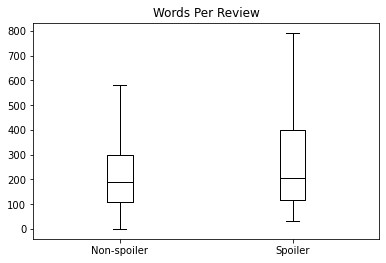

In [6]:
reviews['Words Per Review'] = reviews['review_text'].str.split().str.len()
reviews.boxplot('Words Per Review', by="is_spoiler_text", grid=False,
showfliers=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [7]:
plt.savefig('words_per_review.png')

<Figure size 432x288 with 0 Axes>

In [8]:
# Уменьшаем доминирующий класс 
spoiler_reviews = reviews.loc[reviews['is_spoiler'] == 1]
non_spoiler_reviews = reviews.loc[reviews['is_spoiler'] == 0][:300]
reviews = pd.concat([spoiler_reviews, non_spoiler_reviews])

In [15]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_name = 'cointegrated/rubert-tiny'
reviews_train, reviews_test = train_test_split(reviews, test_size=0.2, random_state=27)
reviews_val, reviews_test = train_test_split(reviews_test, test_size=0.7, random_state=27)
tokenizer = BertTokenizer.from_pretrained(model_name)

train_loader = create_dataloader(reviews_train['review_text'], reviews_train['is_spoiler'], tokenizer)
val_loader = create_dataloader(reviews_val['review_text'], reviews_val['is_spoiler'], tokenizer)
test_loader = create_dataloader(reviews_test['review_text'], reviews_test['is_spoiler'], tokenizer)

model = SpoilerClassifier(model_name)

loss_fn = loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

epochs=5



Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the P

In [16]:
train(
  model,
  train_loader,
  val_loader,
  loss_fn,
  optimizer,
  device,
  epochs
    )

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(



 - Train loss: 0.0443

 - Validation loss: 0.0718
         accuracy    precision    recall    f1-score
-----  ----------  -----------  --------  ----------
Train      0.5751       0.5726    0.5038      0.5360
Val        0.4000       0.4000    0.4000      0.4000
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(



 - Train loss: 0.0319

 - Validation loss: 0.0540
         accuracy    precision    recall    f1-score
-----  ----------  -----------  --------  ----------
Train      0.7875       0.8248    0.7687      0.7958
Val        0.7000       0.6000    0.7500      0.6667
Epoch 3/5


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(



 - Train loss: 0.0137

 - Validation loss: 0.0865
         accuracy    precision    recall    f1-score
-----  ----------  -----------  --------  ----------
Train      0.9560       0.9504    0.9640      0.9571
Val        0.7000       1.0000    0.5000      0.6667
Epoch 4/5


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future v


 - Train loss: 0.0058

 - Validation loss: 0.1599
         accuracy    precision    recall    f1-score
-----  ----------  -----------  --------  ----------
Train      0.9817       0.9844    0.9767      0.9805
Val        0.5000       0.0000    0.0000      0.0000
Epoch 5/5

 - Train loss: 0.0036

 - Validation loss: 0.1672
         accuracy    precision    recall    f1-score
-----  ----------  -----------  --------  ----------
Train      0.9780       1.0000    0.9571      0.9781
Val        0.7000       1.0000    0.5385      0.7000


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


  accuracy    precision    recall    f1-score
----------  -----------  --------  ----------
    0.5306       0.7500    0.1200      0.2069


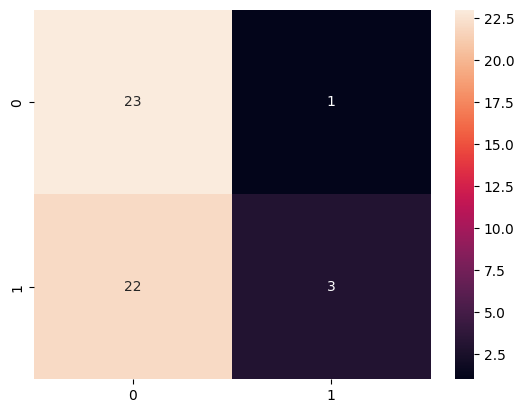

In [17]:
evaluate(model,
  test_loader,
  loss_fn,
  device,
  matrix=True)


In [19]:
torch.save(model.state_dict(),
           'models/reviews_classifier')